# MAT281 - Proyecto Final

* __Nombre__: Lucas Daniel Vargas Arroyo

* __Rol__: 201910502-7

*Nota: Ojo con las rutas de los archivos.*

## 0. Exportación de librerías

In [ ]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Descripción del problema

Bienvenido al año 2912, donde se necesitan tus habilidades de ciencia de datos para resolver un misterio cósmico. Hemos recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

La nave espacial Titanic fue un transatlántico de pasajeros interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

- Para resolver este problema se aplicarán soluciones de Machine Learning, para lo cual se deben analizar y procesar los datos para poder usar un modelo de aprendizaje automático que nos ayudará a predecir el destino de los pasajeros.

## 2. Estadística Descriptiva

Antes de realizar la descripción estadística de los datos, se realizará la extracción de los datos

In [ ]:
# Se comienza extrayendo los datos
path = '/content/drive/MyDrive/Proyecto MAT281/'
train_df = pd.read_csv(path + "train.csv")
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
path = '/content/drive/MyDrive/Proyecto MAT281/'
test_df = pd.read_csv(path + "test.csv")
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
# Se revisan dimensiones de conjunto de entrenamiento y conjunto de prueba
train_df.shape

(8693, 14)

In [ ]:
test_df.shape

(4277, 13)

In [ ]:
# Se establece 'PassengerId' como el indice
train_df.set_index('PassengerId',inplace=True)
test_df.set_index('PassengerId',inplace=True)

In [ ]:
# Se revisa que indice este correcto
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
# Se revisa una descripcion de los datos
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [ ]:
# Se revisan tipos de dato
print("Tipo de dato para train: \n",train_df.dtypes)
print("")
print("Tipo de dato para test: \n",test_df.dtypes)

Tipo de dato para train: 
 HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Tipo de dato para test: 
 HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [ ]:
print("Para conjunto de entrenamiento")
print(train_df.info())
print("")
print("Para conjunto de pruebas")
print(test_df.info())

Para conjunto de entrenamiento
<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB
None

Para conjunto de pruebas
<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Col

## 3. Visualización Descriptiva

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

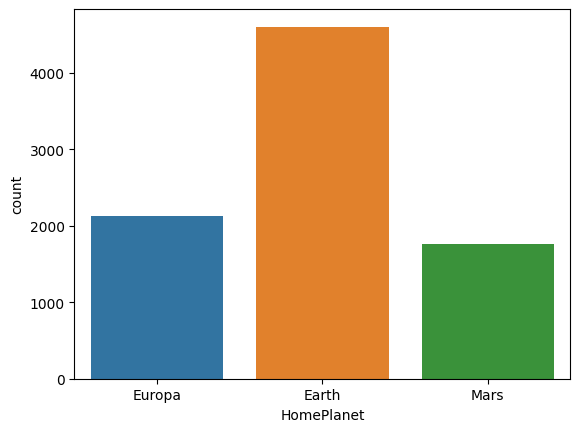

In [ ]:
sns.countplot( x='HomePlanet', data =train_df)
train_df['HomePlanet'].value_counts()

La mayor parte de los pasajeros provienen de la tierra.

False    5439
True     3037
Name: CryoSleep, dtype: int64

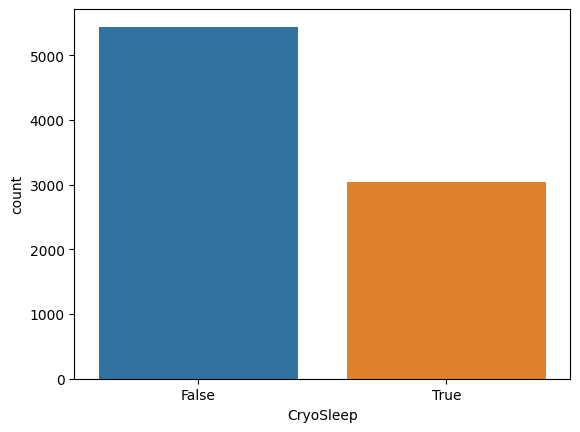

In [ ]:
sns.countplot( x='CryoSleep', data =train_df)
train_df['CryoSleep'].value_counts()

Se pueden visualizar que buena parte de los pasajeros iban con CryoSleep, independiente de su procedencia.

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

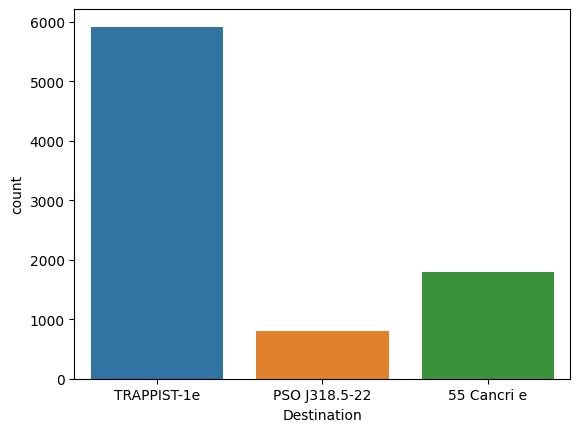

In [ ]:
sns.countplot( x='Destination', data =train_df)
train_df['Destination'].value_counts()

Buena parte de los pasajeros va a TRAPPIST-1e.

False    8291
True      199
Name: VIP, dtype: int64

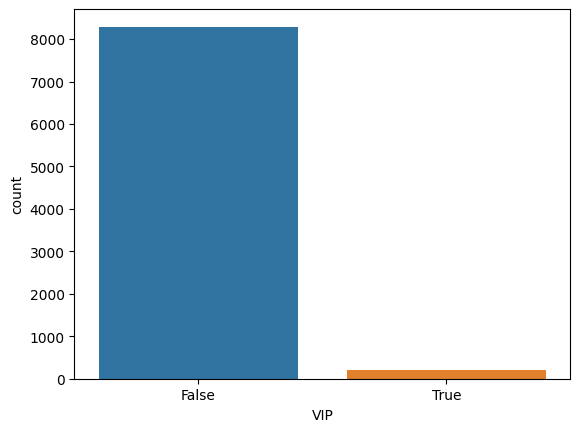

In [ ]:
sns.countplot( x='VIP', data =train_df)
train_df['VIP'].value_counts()

Como era de esperarse, la gran parte de los pasajeros no tiene VIP

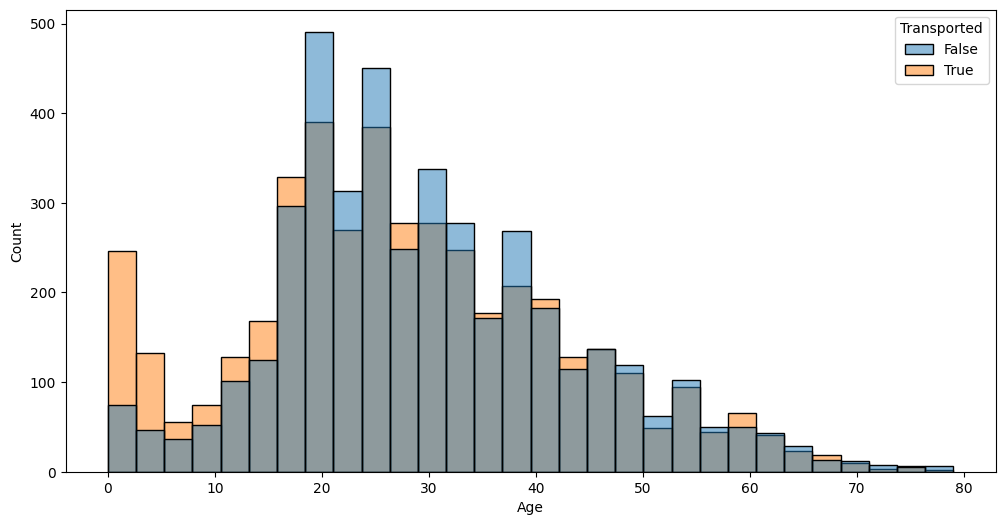

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.histplot(data=train_df, x='Age', hue="Transported",bins=30, ax=ax)
plt.show()

La gran parte de los pasajeros tiene entre 20 y 40 aprox.

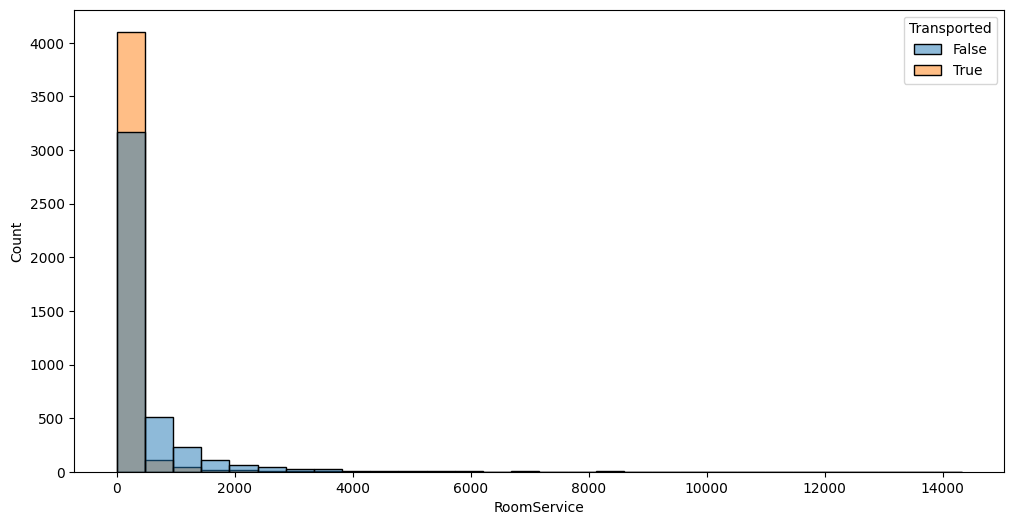

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.histplot(data=train_df, x='RoomService', hue="Transported",bins=30, ax=ax)
plt.show()

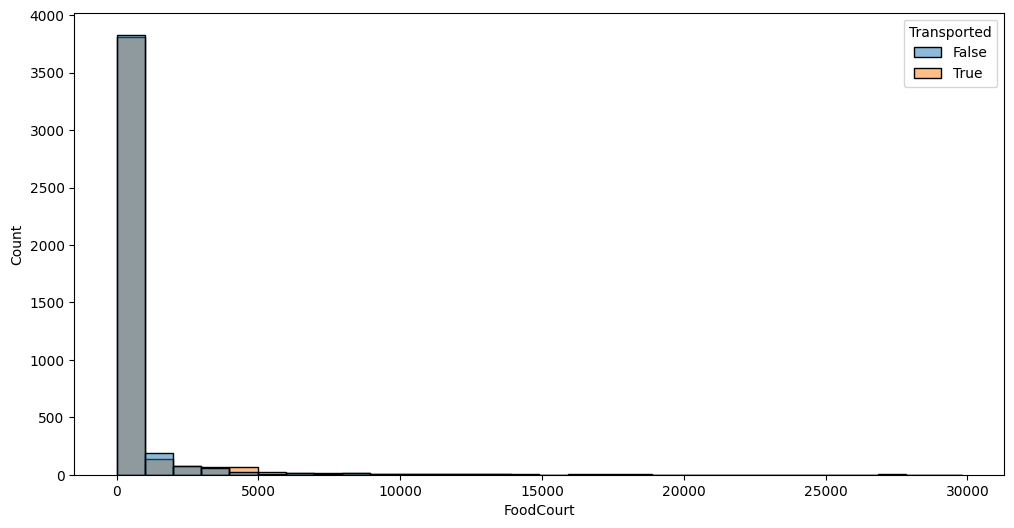

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.histplot(data=train_df, x='FoodCourt', hue="Transported", bins=30, ax=ax)

plt.show()

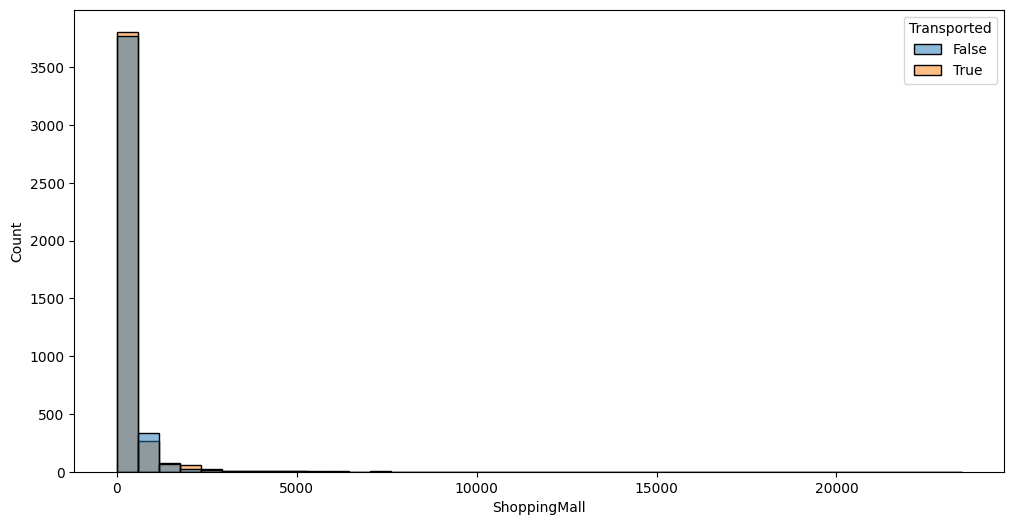

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.histplot(data=train_df, x='ShoppingMall', hue="Transported", bins=40, ax=ax)
plt.show()

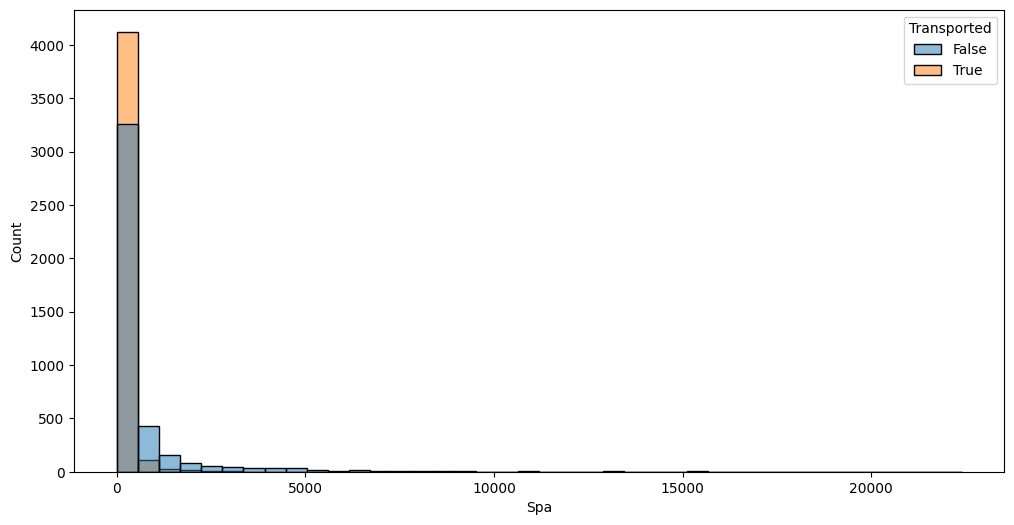

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.histplot(data=train_df, x='Spa', hue="Transported", bins=40, ax=ax)
plt.show()

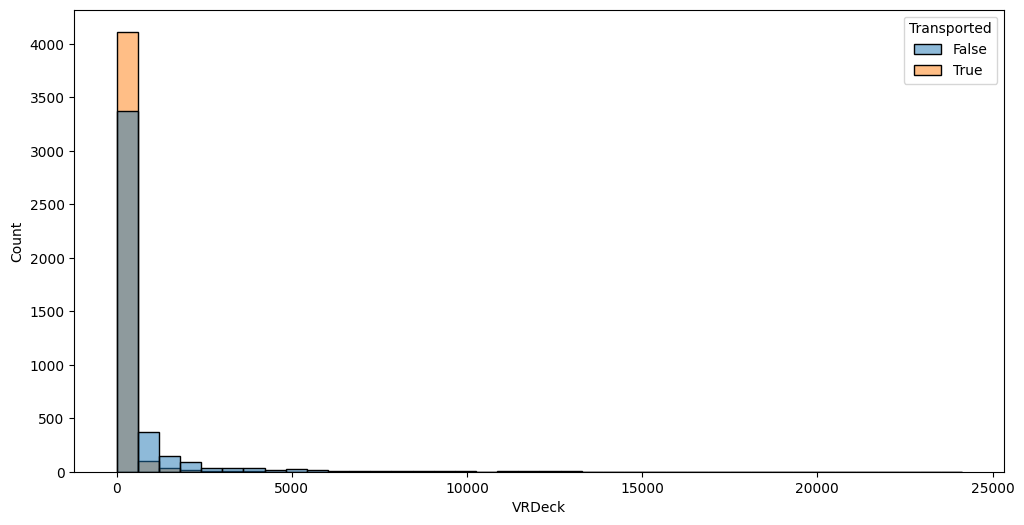

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.histplot(data=train_df, x='VRDeck', hue="Transported", bins=40, ax=ax)
plt.show()

True     4378
False    4315
Name: Transported, dtype: int64

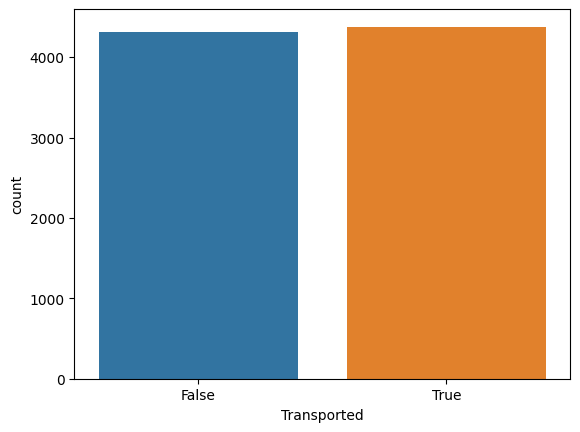

In [ ]:
sns.countplot( x='Transported', data =train_df)
train_df['Transported'].value_counts()

Este ultimo grafico nos muestra que el problema esta balanceado con respecto a las clases.

## 4. Preprocesamiento

In [ ]:
# Se separa el valor a predecir del resto de la data
train_df_Y = train_df['Transported']
train_df = train_df.drop(['Transported'],axis=1)

Para efectos practicos, el nombre es solo para identificar al pasajero, sin embargo, con 'PassengerId' esta columna resulta innecesaria.

In [ ]:
train_df = train_df.drop(['Name'],axis=1)
test_df = test_df.drop(['Name'],axis=1)

In [ ]:
print("Para conjunto de entrenamiento")
print(train_df.info())
print("")
print("Para conjunto de pruebas")
print(test_df.info())

Para conjunto de entrenamiento
<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
dtypes: float64(6), object(5)
memory usage: 1.0+ MB
None

Para conjunto de pruebas
<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    

Se analizara cada columna para poder determinar como limpiar los datos.
- Atributos continuos: Se reemplazan los valores NaN con media de los datos.
- Atributos categoricos: Se reemplazan los valores NaN con moda de los datos.

In [ ]:
# columnas categoricas
col_cat = ['HomePlanet','CryoSleep','Cabin','Destination','VIP']
for col in col_cat:
  print("Valores unicos en",col)
  print("Para train son",len(train_df[col].unique()),":",train_df[col].unique())
  print("Valores unicos en",col)
  print("Para train son",len(train_df[col].unique()),":",train_df[col].unique())
  print("")

Valores unicos en HomePlanet
Para train son 4 : ['Europa' 'Earth' 'Mars' nan]
Valores unicos en HomePlanet
Para train son 4 : ['Europa' 'Earth' 'Mars' nan]

Valores unicos en CryoSleep
Para train son 3 : [False True nan]
Valores unicos en CryoSleep
Para train son 3 : [False True nan]

Valores unicos en Cabin
Para train son 6561 : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Valores unicos en Cabin
Para train son 6561 : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']

Valores unicos en Destination
Para train son 4 : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Valores unicos en Destination
Para train son 4 : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

Valores unicos en VIP
Para train son 3 : [False True nan]
Valores unicos en VIP
Para train son 3 : [False True nan]



In [ ]:
train_df['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
test_df['Cabin'].value_counts()

G/160/P     8
D/273/S     7
B/31/P      7
G/748/S     7
E/228/S     7
           ..
E/236/S     1
F/650/S     1
G/566/P     1
G/557/S     1
G/1498/S    1
Name: Cabin, Length: 3265, dtype: int64

'Cabin' resulta ser un dato util para la identificacion de una persona, pero mas alla de eso no aporta informacion util al problema.

In [ ]:
train_df = train_df.drop(['Cabin'],axis=1)
test_df = test_df.drop(['Cabin'],axis=1)

In [ ]:
print("Para conjunto de entrenamiento")
print(train_df.info())
print("")
print("Para conjunto de pruebas")
print(test_df.info())

Para conjunto de entrenamiento
<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
dtypes: float64(6), object(4)
memory usage: 1005.1+ KB
None

Para conjunto de pruebas
<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep  

In [ ]:
train_df.columns[0]

'HomePlanet'

In [ ]:
cat = ['HomePlanet','CryoSleep','Destination','VIP']
cont = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for columna in cat:
  moda_train = train_df[columna].value_counts().index[0]
  moda_test = test_df[columna].value_counts().index[0]
  train_df[columna] = train_df[columna].fillna(moda_train)
  test_df[columna] = test_df[columna].fillna(moda_test)

for columna in cont:
  media_train = train_df[columna].mean()
  media_test = test_df[columna].mean()
  train_df[columna] = train_df[columna].fillna(media_train)
  test_df[columna] = test_df[columna].fillna(media_test)

In [ ]:
print("Para conjunto de entrenamiento")
print(train_df.info())
print("")
print("Para conjunto de pruebas")
print(test_df.info())

Para conjunto de entrenamiento
<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
dtypes: bool(2), float64(6), object(2)
memory usage: 886.2+ KB
None

Para conjunto de pruebas
<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   Cry

In [ ]:
# Se dividen conjuntos entre atributos categoricos y continuos
cat = ['HomePlanet','Destination']
cont = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train_cat = train_df[cat]
train_cont = train_df[cont]
train_CryoSleep = train_df['CryoSleep']
train_VIP = train_df['VIP']

test_cat = test_df[cat]
test_cont = test_df[cont]
test_CryoSleep = test_df['CryoSleep']
test_VIP = test_df['VIP']

In [ ]:
# Se aplican encoders
encoder1 = OneHotEncoder(sparse_output=False)
index_train_cat = train_cat.index
train_cat = encoder1.fit_transform(train_cat[cat])
train_cat = pd.DataFrame(train_cat, columns=encoder1.get_feature_names_out(cat))
train_cat.index = index_train_cat

index_test_cat = test_cat.index
test_cat = encoder1.transform(test_cat[cat])
test_cat = pd.DataFrame(test_cat,columns=encoder1.get_feature_names_out(cat))
test_cat.index = index_test_cat

In [ ]:
# Se escalan atributos continuos
scaler1 = StandardScaler()
scaler1.fit(train_cont)
index_train_cont = train_cont.index
train_cont = pd.DataFrame(scaler1.transform(train_cont),columns=cont)
train_cont.index = index_train_cont

index_test_cont = test_cont.index
test_cont = pd.DataFrame(scaler1.transform(test_cont),columns=cont)
test_cont.index = index_test_cont

In [ ]:
# Se concatenan los dataframes
train_df = pd.concat([train_cat,train_cont,train_CryoSleep,train_VIP],axis=1)
test_df = pd.concat([test_cat,test_cont,test_CryoSleep,test_VIP],axis=1)

In [ ]:
train_df.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP
PassengerId,,,,,,,,,,,,,,
0001_01,0.0,1.0,0.0,0.0,0.0,1.0,0.709437,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,False,False
0002_01,1.0,0.0,0.0,0.0,0.0,1.0,-0.336717,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,False,False
0003_01,0.0,1.0,0.0,0.0,0.0,1.0,2.034566,-0.275409,1.955616,-0.290817,5.694289,-0.225782,False,True
0003_02,0.0,1.0,0.0,0.0,0.0,1.0,0.290975,-0.340590,0.517406,0.330225,2.683471,-0.098708,False,False
0004_01,1.0,0.0,0.0,0.0,0.0,1.0,-0.894666,0.118709,-0.243409,-0.038048,0.225732,-0.267258,False,False


In [ ]:
test_df.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP
PassengerId,,,,,,,,,,,,,,
0013_01,1.0,0.0,0.0,0.0,0.0,1.0,-0.127486,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,True,False
0018_01,1.0,0.0,0.0,0.0,0.0,1.0,-0.685435,-0.340590,-0.281669,-0.290817,2.233537,-0.269023,False,False
0019_01,0.0,1.0,0.0,1.0,0.0,0.0,0.151488,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,True,False
0021_01,0.0,1.0,0.0,0.0,0.0,1.0,0.639693,-0.340590,3.884937,-0.290817,-0.115719,0.247217,False,False
0023_01,1.0,0.0,0.0,0.0,0.0,1.0,-0.615692,-0.325431,-0.287314,0.772152,-0.276663,-0.269023,False,False


In [ ]:
# Sera necesario hacer esta transformacion
test_df_neural = np.asarray(test_df).astype(np.float32)
test_df_neural

array([[ 1.        ,  0.        ,  0.        , ..., -0.2690226 ,
         1.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.2690226 ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.2690226 ,
         1.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.2690226 ,
         1.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.19250476,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.2690226 ,
         1.        ,  0.        ]], dtype=float32)

## 5. Selección de Modelos

### i) Para este apartado probaremos con 4 modelos:

- Support Vector Classifier (SVC)

- Decision Tree Classifier

- Random Forest Classifier

- Red Neuronal Densa

### ii) Para los primeros 3 modelos se hará el mismo corte de los datos para optimización de hiperparametros y entrenamiento, mientras que para la red neuronal sera necesario un trato distinto de los datos.

In [ ]:
# Se dividen los datos de train_df
X_train, X_test, y_train, y_test = train_test_split(train_df, train_df_Y, test_size=0.2, random_state=42)

In [ ]:
# Se definen modelos
modelo1 = SVC()
modelo2 = DecisionTreeClassifier()
modelo3 = RandomForestClassifier()

### iii) Optimización de hiperparámetros

In [ ]:
param_grid1 = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search1 = GridSearchCV(modelo1, param_grid1, cv=5, scoring = 'accuracy')
grid_search1.fit(X_train,y_train)
print("Mejores hiperparámetros para SVC:", grid_search1.best_params_)
print("Precisión en el conjunto de prueba:", round(grid_search1.score(X_test, y_test),5))

Mejores hiperparámetros para SVC: {'C': 10, 'kernel': 'rbf'}
Precisión en el conjunto de prueba: 0.77918


In [ ]:
best_C_svc = grid_search1.best_params_['C']
best_kernel = grid_search1.best_params_['kernel']
modelo1 = SVC(C=best_C_svc,kernel=best_kernel)
modelo1.fit(X_train,y_train)
y_pred1 = modelo1.predict(X_test)

In [ ]:
param_grid2 = {'max_depth': [1, 5, 10, 15, 20, 25, 30], 'min_samples_split': [20, 50, 100, 150, 200]}
grid_search2 = GridSearchCV(modelo2, param_grid2, cv=5, scoring = 'accuracy')
grid_search2.fit(X_train,y_train)
print("Mejores hiperparámetros para Decision Tree Classifier:", grid_search2.best_params_)
print("Precisión en el conjunto de prueba:", round(grid_search2.score(X_test, y_test),5))

Mejores hiperparámetros para Decision Tree Classifier: {'max_depth': 10, 'min_samples_split': 100}
Precisión en el conjunto de prueba: 0.77976


In [ ]:
best_max_depth_dt = grid_search2.best_params_['max_depth']
best_min_samples_split_dt = grid_search2.best_params_['min_samples_split']
modelo2 = DecisionTreeClassifier(max_depth=best_max_depth_dt, min_samples_split=best_min_samples_split_dt)
modelo2.fit(X_train,y_train)
y_pred2 = modelo2.predict(X_test)

In [ ]:
param_grid3 = {'n_estimators': [50, 100, 150], 'max_depth': [1, 5, 10, 15], 'min_samples_split': [20, 50, 100]}
grid_search3 = GridSearchCV(modelo3, param_grid3, cv=5, scoring = 'accuracy')
grid_search3.fit(X_train,y_train)
print("Mejores hiperparámetros para Random Forest Classifier:", grid_search3.best_params_)
print("Precisión en el conjunto de prueba:", round(grid_search3.score(X_test, y_test),5))

Mejores hiperparámetros para Random Forest Classifier: {'max_depth': 15, 'min_samples_split': 50, 'n_estimators': 100}
Precisión en el conjunto de prueba: 0.79011


In [ ]:
best_n_estimators_rf = grid_search3.best_params_['n_estimators']
best_max_depth_rf = grid_search3.best_params_['max_depth']
best_min_samples_split_rf = grid_search3.best_params_['min_samples_split']
modelo3 = RandomForestClassifier(n_estimators= best_n_estimators_rf, max_depth=best_max_depth_rf, min_samples_split=best_min_samples_split_rf,random_state=42)
modelo3.fit(X_train,y_train)
y_pred3 = modelo3.predict(X_test)

### iv) Red Neuronal

In [ ]:
# Se transforman datos para que la red neuronal sea entrenada correctamente
X_train_neural = np.asarray(X_train).astype(np.float32)
X_test_neural = np.asarray(X_test).astype(np.float32)
y_train_neural = np.asarray(y_train).astype(np.float32)
y_test_neural = np.asarray(y_test).astype(np.float32)

In [ ]:
# Construir el modelo
modelo4 = Sequential()
modelo4.add(Dense(units=32, activation='relu', input_dim=14)) # Capa con 32 neuronas
modelo4.add(Dense(units=1, activation='sigmoid'))  # Capa de salida con 1 neurona y activación sigmoide para clasificación binaria

# Compilar el modelo
modelo4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar y evaluar el modelo
historial = modelo4.fit(X_train_neural, y_train_neural, epochs=10, batch_size=32, validation_split=0.2)
y_pred4 = modelo4.predict(X_test_neural)

Epoch 1/10
174/174 [==============================] - 1s 2ms/step - loss: 0.5385 - accuracy: 0.7555 - val_loss: 0.4585 - val_accuracy: 0.7944
Epoch 2/10
174/174 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7825 - val_loss: 0.4259 - val_accuracy: 0.7930
Epoch 3/10
174/174 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.7861 - val_loss: 0.4168 - val_accuracy: 0.7994
Epoch 4/10
174/174 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.7884 - val_loss: 0.4129 - val_accuracy: 0.7951
Epoch 5/10
174/174 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.7900 - val_loss: 0.4100 - val_accuracy: 0.7980
Epoch 6/10
174/174 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7935 - val_loss: 0.4098 - val_accuracy: 0.7994
Epoch 7/10
174/174 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7931 - val_loss: 0.4074 - val_accuracy: 0.8030
Epoch 

## 6. Métricas y análisis de resultados

Primero revisaremos las métricas con respecto al dataset train_df, posteriormente realizaremos la evaluacion de los modelos al subir las predicciones a kaggle y asi analizar los resultados.

### I) Métricas

In [ ]:
# metricas asociadas al modelo 1
print("Metricas asociadas a modelo 1 (SVC): ")
print(classification_report(y_test,y_pred1))
print("La precision fue de: ",round(accuracy_score(y_test,y_pred1),5))

Metricas asociadas a modelo 1 (SVC): 
              precision    recall  f1-score   support

       False       0.79      0.75      0.77       861
        True       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

La precision fue de:  0.77918


In [ ]:
# metricas asociadas al modelo 2
print("Metricas asociadas a modelo 2 (Decision Tree Classifier): ")
print(classification_report(y_test,y_pred2))
print("La precision fue de: ",round(accuracy_score(y_test,y_pred2),5))

Metricas asociadas a modelo 2 (Decision Tree Classifier): 
              precision    recall  f1-score   support

       False       0.81      0.73      0.77       861
        True       0.76      0.83      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

La precision fue de:  0.77976


In [ ]:
# metricas asociadas al modelo 3
print("Metricas asociadas a modelo 3 (Random Forest Classifier): ")
print(classification_report(y_test,y_pred3))
print("La precision fue de: ",round(accuracy_score(y_test,y_pred3),5))

Metricas asociadas a modelo 3 (Random Forest Classifier): 
              precision    recall  f1-score   support

       False       0.80      0.76      0.78       861
        True       0.77      0.82      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

La precision fue de:  0.78838


In [ ]:
y_test_neural

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
y_pred4

array([[0.11897151],
       [0.57664883],
       [0.62741566],
       ...,
       [0.39581525],
       [0.8536168 ],
       [0.04377315]], dtype=float32)

In [ ]:
# metricas asociadas al modelo 4
y_pred_bin4 = (y_pred4 >= 0.5).astype(bool)
print("Metricas asociadas a modelo 4 (Red Neuronal): ")
print(classification_report(y_test_neural,y_pred_bin4))
print("La precision fue de: ",round(accuracy_score(y_test_neural,y_pred_bin4),5))

Metricas asociadas a modelo 4 (Red Neuronal): 
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78       861
         1.0       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

La precision fue de:  0.78378


### II) Evaluacion de los modelos en test_df y creacion de archivos para kaggle

In [ ]:
# Predicciones para modelo 1 (SVC)
y_pred1_oficial = modelo1.predict(test_df)
y_pred1_oficial

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
submmit1 = pd.DataFrame(y_pred1_oficial,index=test_df.index, columns=['Transported'])
submmit1

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [ ]:
submmit1.to_csv('/content/drive/MyDrive/Proyecto MAT281/pred_SVC.csv')

In [ ]:
# Predicciones para modelo 2 (Decision Tree Classifier)
y_pred2_oficial = modelo2.predict(test_df)
y_pred2_oficial

array([ True, False,  True, ...,  True, False,  True])

In [ ]:
submmit2 = pd.DataFrame(y_pred2_oficial,index=test_df.index, columns=['Transported'])
submmit2

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [ ]:
submmit2.to_csv('/content/drive/MyDrive/Proyecto MAT281/pred_DT.csv')

In [ ]:
# Predicciones para modelo 3 (Random Forest Classifier)
y_pred3_oficial = modelo3.predict(test_df)
y_pred3_oficial

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
submmit3 = pd.DataFrame(y_pred3_oficial,index=test_df.index, columns=['Transported'])
submmit3

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [ ]:
submmit3.to_csv('/content/drive/MyDrive/Proyecto MAT281/pred_RF.csv')

In [ ]:
# Predicciones para modelo 4 (Red Neuronal)
y_pred4_oficial = modelo4.predict(test_df_neural)
y_pred4_oficial

134/134 [==============================] - 0s 1ms/step


array([[0.6370173 ],
       [0.01400749],
       [0.98329824],
       ...,
       [0.92729944],
       [0.83832586],
       [0.69294673]], dtype=float32)

In [ ]:
y_pred4_of_bin = (y_pred4_oficial >= 0.5).astype(bool)
submmit4 = pd.DataFrame(y_pred4_of_bin,index=test_df.index, columns=['Transported'])
submmit4

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
...,...
9266_02,True
9269_01,False
9271_01,True


In [ ]:
submmit4.to_csv('/content/drive/MyDrive/Proyecto MAT281/pred_red_neuronal.csv')

### III) Análisis de resultados

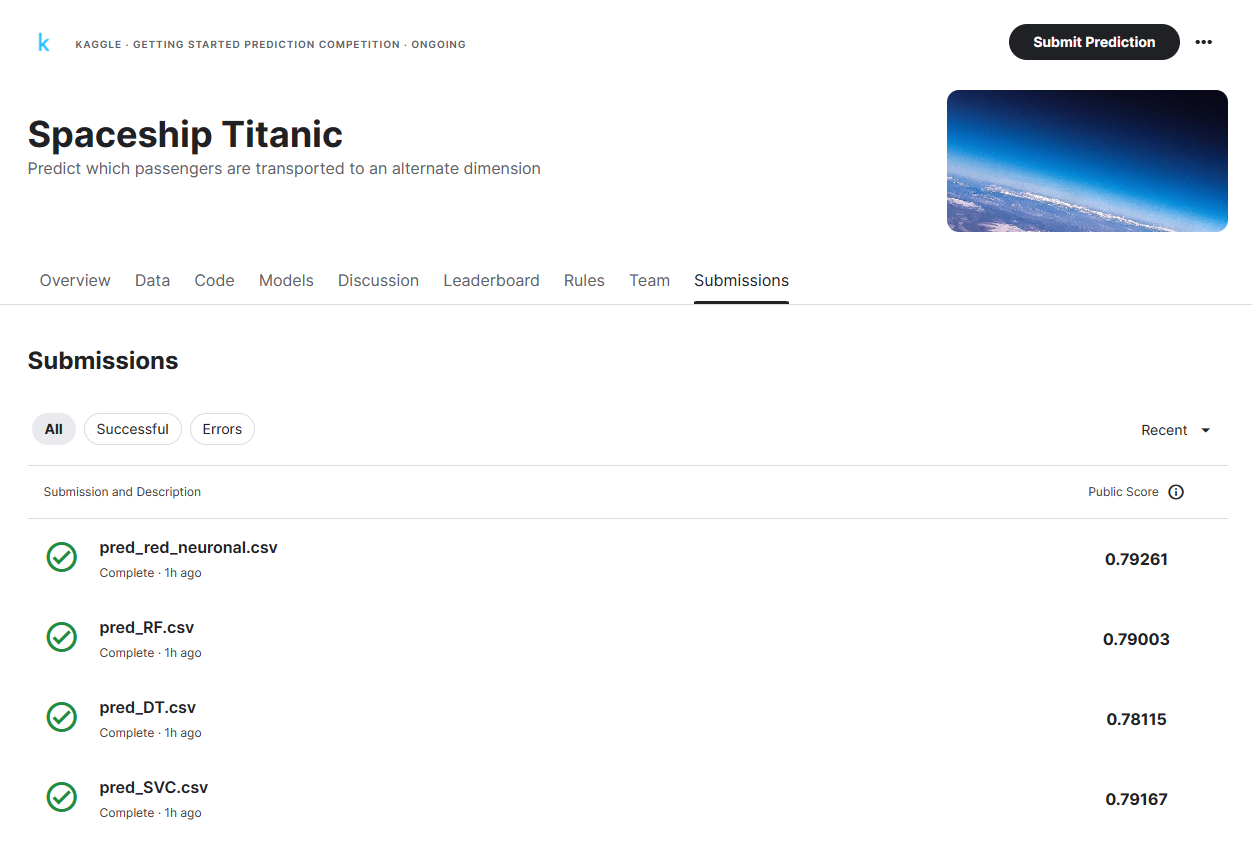

Con respecto a los 4 modelos podemos notar lo siguiente:

- Modelo 1 (SVC): La precision en el entrenamiento fue de 0.77918 y en la prueba fue de 0.79167, por lo que el modelo funcionó bastante bien y no presentó overfitting.

- Modelo 2 (Decision Tree Classifier): La precision en el entrenamiento fue de 0.77976 y en la prueba fue de 0.78115, con lo que este modelo tampoco tuvo overfitting.

- Modelo 3 (Random Forest Classifier): La precision en el entrenamiento fue de 0.78838 y en la prueba fue de 0.79003, con lo que no presenta overfitting.

- Modelo 4 (Red Neuronal): La precision en el entrenamiento fue de 0.77378 y en la prueba fue de 0.79261, con lo que no presenta overfitting.



## 7. Visualizaciones del modelo

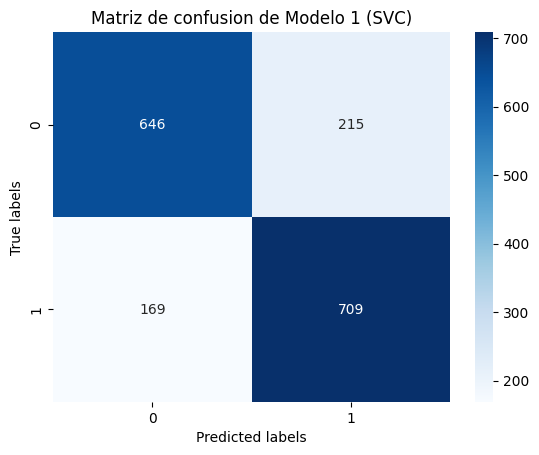

In [ ]:
# Construir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred1)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Matriz de confusion de Modelo 1 (SVC)")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

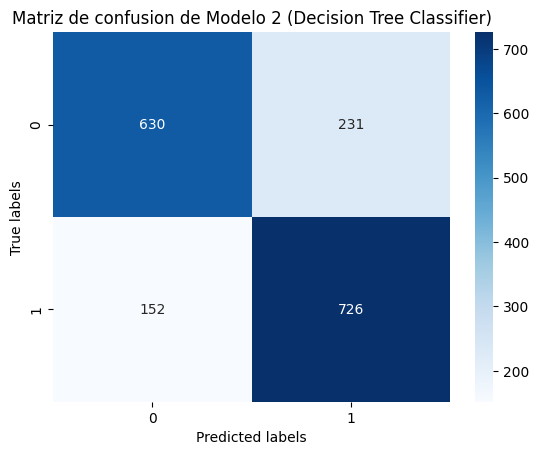

In [ ]:
# Construir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred2)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Matriz de confusion de Modelo 2 (Decision Tree Classifier)")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

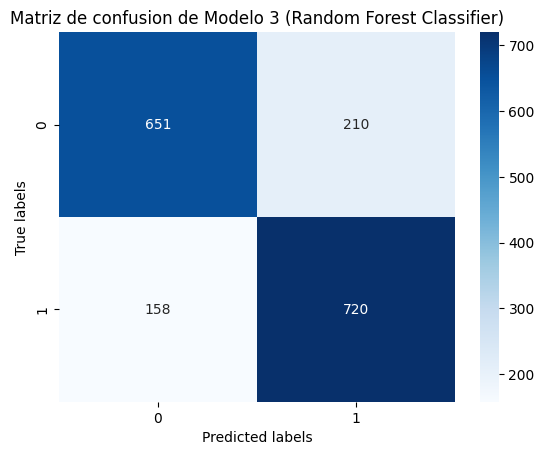

In [ ]:
# Construir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred3)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Matriz de confusion de Modelo 3 (Random Forest Classifier)")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

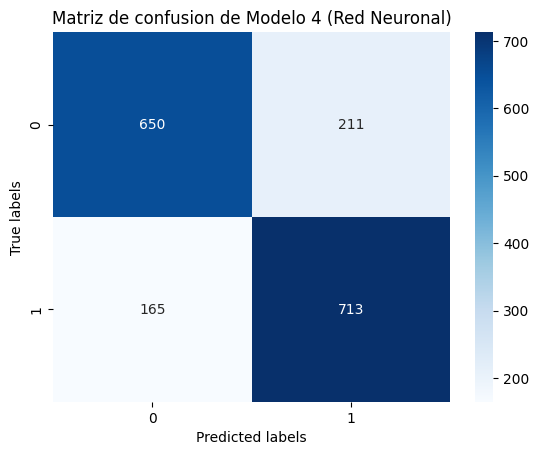

In [ ]:
# Construir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_bin4)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Matriz de confusion de Modelo 4 (Red Neuronal)")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## 8. Conclusiones

En este proyecto se pudo observar que los resultados de los modelos propuestos no fueron muy distintos, por lo que se debiese optar por el modelo mas eficiente en terminos computacionales, ademas fue posible mostrar algo dificil de observar, esto es, que el error de prueba sea menor que el error de entrenamiento, esto puede ser debido a que la data de entrenamiento resulto bastante provechosa para los modelos utilizados y la data de prueba fue mejor predicha que los valores de entrenamiento.